<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day_6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#simple linear regression using salay dataset

In [2]:

data=pd.read_csv('/content/Salary_Data.csv')
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [33]:
x=data.drop(['Salary'],axis=1)
y=data['Salary']
print(x.shape)
print(y.shape)

(30, 1)
(30,)


In [42]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [35]:
#test_train_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)



In [39]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
sc=lr.score(x_test,y_test)
print(sc*100,'%')


97.3886090266601 %


In [40]:
lr.predict([[5.5]])

array([77491.32764582])

In [41]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [46]:
#except the last label
x=data.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [47]:
y=data.iloc[:,-1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

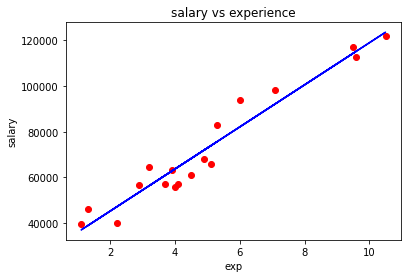

In [50]:
#visualize the training set result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.title("salary vs experience")
plt.ylabel("salary")
plt.xlabel("exp")
plt.show()

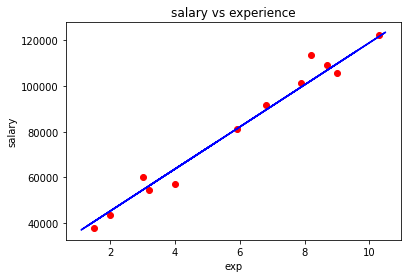

In [51]:
#visualize test set reult
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.title("salary vs experience")
plt.ylabel("salary")
plt.xlabel("exp")
plt.show()

#Multiple regression

In [54]:
#50 startups
data=pd.read_csv("/content/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
#splitting data in x and y
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [62]:
#as we need to handle state bez it is a categorical variable
#encode the cat variable

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [63]:
#split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)


In [64]:
#trainng multiple linear regression

from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#predict 
y_pred=mlr.predict(x_test)

In [66]:
#accuracy
sc=mlr.score(x_test,y_test)
print(sc*100,'%')

93.47068473282515 %


ValueError: ignored

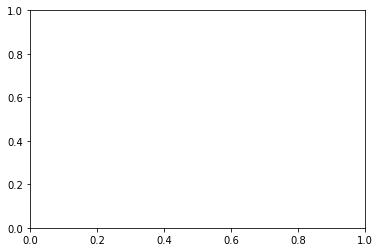

In [67]:
#visualize

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,mlr.predict(x_train),color='blue')
plt.title("Multiple linear regression")
plt.ylabel("profit")
plt.xlabel("exp")
plt.show()

#Polynomial regression

In [69]:
data=pd.read_csv("/content/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [73]:
#splitting data in x and y
#we r not using the name
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [74]:
#trainng polynomial regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#implement poly regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
lr2=LinearRegression()
lr2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

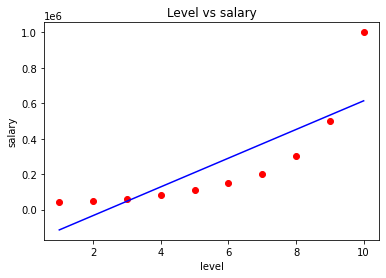

In [77]:
#visulaize
plt.scatter(x,y,color='red')
plt.plot(x,lr.predict(x),color='blue')
plt.title("Level vs salary")
plt.ylabel("salary")
plt.xlabel("level")
plt.show()

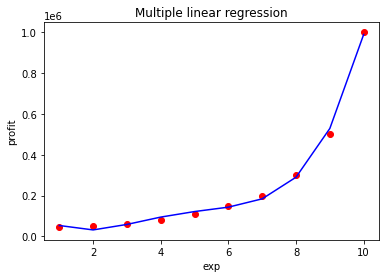

In [78]:
plt.scatter(x,y,color='red')
plt.plot(x,lr2.predict(poly_reg.transform(x)),color='blue')
plt.title("Multiple linear regression")
plt.ylabel("profit")
plt.xlabel("exp")
plt.show()

In [79]:
lr.predict([[5]])

array([209060.60606061])

In [80]:
#Let's predict a new value using polynomial regression

lr2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])